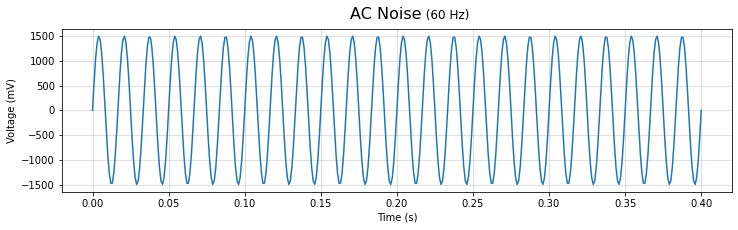

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz

x = np.linspace(start,end,dn)
noi_data = 1500*np.sin(x*math.pi*2*60)  # 교류 전원 노이즈 (60 Hz)
plt.figure(figsize=(12,3))
plt.suptitle('AC Noise',size=16)
plt.title('                          (60 Hz)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,noi_data);

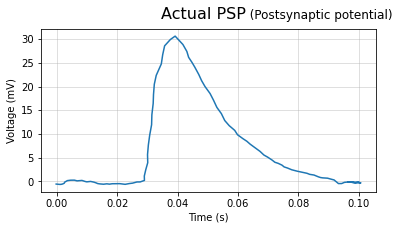

In [2]:
import csv  # psp 가정
f = open("C:/Users/enjdn/Documents/MEG_python/MEG_data_artifi/psp5.csv","rt")
reader = csv.reader(f)

col1 = []
col2 = []
for row in reader:
    col1.append(row[0])
    col2.append(row[1])

del col1[0]
del col2[0]

len(col1)

time = np.array(list(map(float, col1)))
volt = np.array(list(map(float, col2)))
plt.figure(figsize=(6, 3))  # 실제 psp 그래프
plt.suptitle('Actual PSP',size=16)
plt.title('                                                          (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(time,volt);

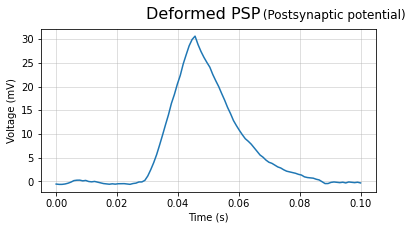

In [3]:
n = 104
x_2 = np.linspace(0,0.1,n)  # scale 조정을 위해 변형된 psp 그래프
plt.figure(figsize=(6, 3))
plt.suptitle('Deformed PSP',size=16)
plt.title('                                                                 (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x_2,volt);

401

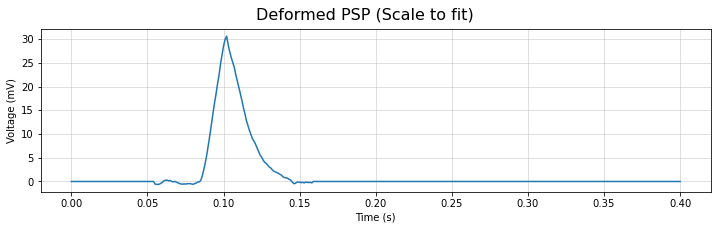

In [4]:
c = np.zeros(shape=(55,), dtype=np.int8)  # signal 0.01 s 로 
volt_1 = np.concatenate((c, volt), axis=None)
d = np.zeros(shape=(242,), dtype=np.int8)
volt_2 = np.concatenate((volt_1, d), axis=None)

plt.figure(figsize=(12,3))
plt.suptitle('Deformed PSP (Scale to fit)',size=16)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x,volt_2);  # noise와 scale 맞추기
len(volt_2)

In [18]:
# Biot-Savart Law에 따른 signal 자기장

n,m = 9, 9
sensor_array = np.zeros((n,m), dtype = np.ndarray)  # n X m 채널 sensor의 위치
for i in range(n):
    for j in range(m):
        sensor_array[i,j] = np.array([4*(i-(n-1)/2),4*(j-(m-1)/2),4])  # [0,0]으로 위치 세팅 & 채널 간격 4cm

sig = np.array([1,1,0])  # signal의 방향 및 크기 (4 cm 로 가정)
noi_1 = np.array([0,1000,4])  # noise의 위치(1 m로 가정)  


dl_vec_sig = sig/np.linalg.norm(sig)  # signal의 단위 벡터

R_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 signal이 떨어진 거리 R
for i in range(n):
    for j in range(m):
        R_sig[i,j] = np.linalg.norm(sensor_array[i,j])

a_R_sig = sensor_array/R_sig  # 각각의 sensor 채널을 향하는 R의 단위벡터 a_R

H_vec_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 signal 벡터의 크기
for i in range(n):
    for j in range(m):
        H_vec_sig[i,j] = np.cross(dl_vec_sig,a_R_sig[i,j])

H_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) 
for i in range(n):
    for j in range(m):
        g_noise = np.random.randn(401)  # 가우시안 noise 생성 
        H_sig[i,j]  = (float(H_vec_sig[i,j][2])/((4*np.pi)*float(R_sig[i,j])**2))*volt_2 + g_noise*0.001

        
R_noi_1 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 noise가 떨어진 거리 R (1 m)
for i in range(n):
    for j in range(m):
        R_noi_1[i,j] = np.linalg.norm(sensor_array[i,j]-noi_1)

H_noi_1 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 noise의 자기장 (with Biot-Savart Law) (1 m)
for i in range(n):
    for j in range(m):
        H_noi_1[i,j] = noi_data/(2*np.pi*R_noi_1[i,j])

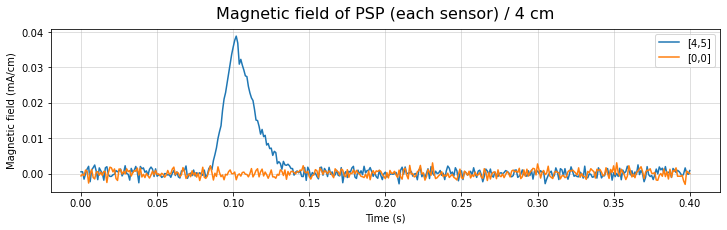

In [19]:
plt.figure(figsize=(12, 3)) # Sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) + 각 채널에 가우시안 noise 
plt.title('Magnetic field of PSP (each sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,H_sig[4,5], label='[4,5]')  # Sensor[4,5]에서 signal
plt.plot(x,H_sig[0,0], label='[0,0]')  # Sensor[0,0]에서 signal
plt.legend();

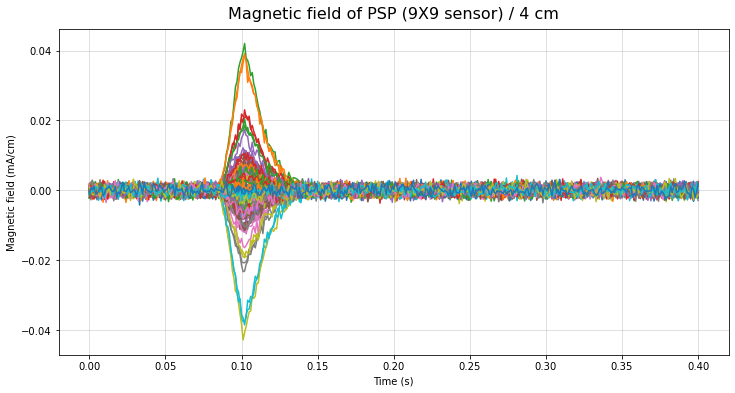

In [20]:
plt.figure(figsize=(12, 6)) # 9 X 9 Sensor에 들어오는 최종 signal의 자기장
plt.title('Magnetic field of PSP (9X9 sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_sig[i,j])

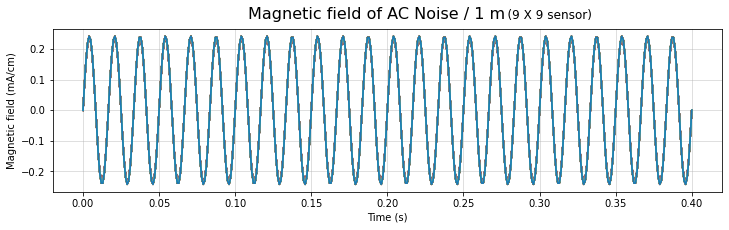

In [21]:
plt.figure(figsize=(12, 3)) 
plt.suptitle('Magnetic field of AC Noise / 1 m',size=16)
plt.title('                                                                                    (9 X 9 sensor)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_noi_1[i,j])

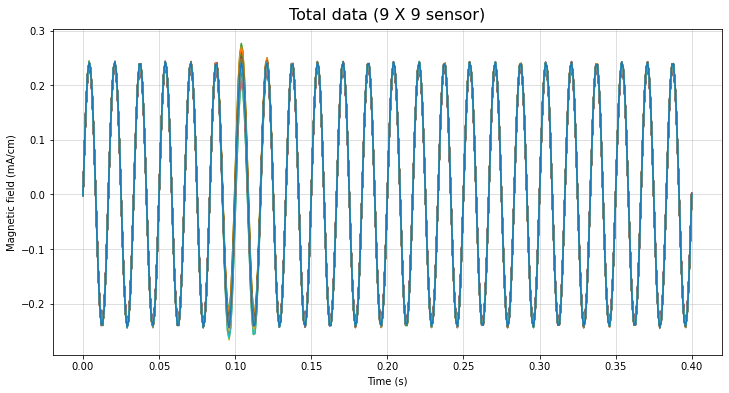

In [22]:
plt.figure(figsize=(12, 6))  # 각각의 sensor 에서 받아들인 총 데이터  (1 m)
plt.title('Total data (9 X 9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x, H_sig[i,j] + H_noi_1[i,j])

In [23]:
H_all_f_1 = []  # 각각의 sensor 에서 받아들인 총 신호  (1 m)
for i in range(n):
    for j in range(m):
        H_all_f_1.append(list(H_sig[i,j] + H_noi_1[i,j]))
len(H_all_f_1)

81

In [24]:
import pandas as pd

# frame = pd.DataFrame(H_all_f)

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz
x = np.linspace(start,end,dn)

indexName_col = x  # Data frame에 각 센서별 데이터 기록
indexName = []
for i in range(n*m):
    indexName.append('Sensor_'+str(i+1))
df = pd.DataFrame(H_all_f_1, columns = indexName_col,index = indexName)
df

,0.000,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400
Sensor_1,-0.000672,0.086295,0.160236,0.213571,0.235125,0.220741,0.181052,0.114313,0.028310,-0.059976,...,0.060019,-0.030226,-0.113950,-0.181819,-0.223930,-0.236574,-0.215658,-0.160137,-0.086198,-0.000049
Sensor_2,0.002060,0.087658,0.159660,0.213499,0.235112,0.224241,0.182091,0.113222,0.029892,-0.059015,...,0.057601,-0.029440,-0.112505,-0.183696,-0.223972,-0.235239,-0.214528,-0.162988,-0.086511,0.001366
Sensor_3,-0.000219,0.085928,0.162255,0.215110,0.236529,0.224538,0.183627,0.113437,0.029428,-0.059071,...,0.060635,-0.030053,-0.114207,-0.182256,-0.224473,-0.236287,-0.215004,-0.161318,-0.087744,-0.001425
Sensor_4,-0.000127,0.089201,0.162211,0.215942,0.239273,0.227524,0.183536,0.114104,0.028733,-0.061680,...,0.059122,-0.029412,-0.116684,-0.183529,-0.227542,-0.239210,-0.213435,-0.161649,-0.087789,-0.000473
Sensor_5,0.000022,0.087859,0.163437,0.215499,0.237443,0.226471,0.184208,0.114445,0.031230,-0.060761,...,0.058543,-0.030631,-0.113326,-0.183528,-0.226224,-0.237686,-0.217014,-0.163337,-0.087496,-0.001174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sensor_77,0.001054,0.088149,0.164139,0.217135,0.240148,0.227535,0.183813,0.113792,0.029854,-0.061647,...,0.059779,-0.027998,-0.113754,-0.184651,-0.227189,-0.237236,-0.215903,-0.161144,-0.088835,0.000477
Sensor_78,-0.000042,0.088178,0.165261,0.216675,0.239809,0.228462,0.183408,0.115167,0.029681,-0.059636,...,0.059487,-0.028415,-0.113420,-0.184799,-0.228314,-0.239833,-0.218907,-0.162255,-0.088490,0.000084
Sensor_79,0.000700,0.088793,0.163420,0.216574,0.240690,0.230634,0.184503,0.113874,0.029700,-0.060246,...,0.059242,-0.028706,-0.116141,-0.186133,-0.230567,-0.239232,-0.220436,-0.164043,-0.090753,-0.001142
Sensor_80,-0.001116,0.088319,0.165250,0.218302,0.242137,0.230716,0.185975,0.116151,0.030204,-0.059162,...,0.060715,-0.031065,-0.118843,-0.187712,-0.229784,-0.240231,-0.217536,-0.166701,-0.086505,0.000063


In [25]:
from sklearn.preprocessing import StandardScaler
for i in range(401):
    indexName_col[i] = indexName_col[i]
time = indexName_col

Sensor_x = df.loc[:,time].values
    
x_std = StandardScaler().fit_transform(Sensor_x.T)
x_std.shape

(401, 81)

In [26]:
time_f = x_std.T
covariance_matrix = np.cov(time_f)
# np.set_printoptions(threshold=np.inf,linewidth=np.inf)  # '...' 생략 없이 출력
covariance_matrix.shape

(81, 81)

In [27]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [29]:
# 주성분별 데이터를 설명하는 정도 (10000% 기준)

print('PC1 = ',round(float(eig_vals[0]/sum(eig_vals))*10000,2),'%')
print('PC2 = ',round(float(eig_vals[1]/sum(eig_vals))*10000,2),'%')
print('PC3 = ',round(float(eig_vals[2]/sum(eig_vals))*10000,2),'%')
print('PC4 = ',round(float(eig_vals[3]/sum(eig_vals))*10000,2),'%')

PC1 =  9997.49 %
PC2 =  2.17 %
PC3 =  0.01 %
PC4 =  0.01 %


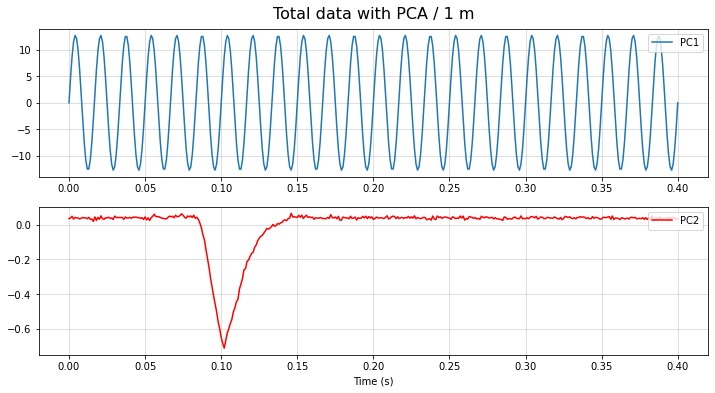

In [30]:
plt.figure(figsize=(12,6)) 
plt.subplot(2,1,1)
plt.title('Total data with PCA / 1 m',size=16, pad=10)
plt.grid(which='both',axis='both',alpha=0.5)
x_pc1 = x_std.dot(eig_vecs.T[0])
plt.plot(time,x_pc1.T,label='PC1')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.xlabel('Time (s)')
plt.grid(which='both',axis='both',alpha=0.5)
x_pc2 = x_std.dot(eig_vecs.T[1])
plt.plot(time,x_pc2.T, color='red',label='PC2')
plt.legend(loc='upper right');